In [5]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import models
import ensemble as ens
import numpy as np
import h5py
import augmentation as au

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
with h5py.File('/home/trace-local/trace/isbi/validation-affinities.h5', 'r') as label_file:
    labels = label_file['main']
    print(labels.shape)
    reshaped_labels = np.einsum('dzyx->zyxd', labels[0:2])
    print(reshaped_labels.shape)

(3, 3, 512, 512)
(3, 512, 512, 2)


In [ ]:
models.ConvNet

In [2]:
cnet.ConvNet(cnet.DEFAULT_PARAMS)

Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 13
Layer 4,	type: pool,	filter: [2, 2],	FOV: 15
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 27
Layer 6,	type: pool,	filter: [2, 2],	FOV: 31
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 55
Layer 8,	type: pool,	filter: [2, 2],	FOV: 63
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 95
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 95


<models.conv_net.ConvNet instance at 0x7fdf246473b0>

In [7]:
models.DEFAULT_PARAMS

{'fov': 95,
 'input': 195,
 'layers': [{'activation_fn': <function tensorflow.python.ops.gen_nn_ops.relu>,
   'filter_size': 4,
   'n_feature_maps': 48,
   'type': 'conv2d'},
  {'filter_size': 2, 'type': 'pool'},
  {'activation_fn': <function tensorflow.python.ops.gen_nn_ops.relu>,
   'filter_size': 5,
   'n_feature_maps': 68,
   'type': 'conv2d'},
  {'filter_size': 2, 'type': 'pool'},
  {'activation_fn': <function tensorflow.python.ops.gen_nn_ops.relu>,
   'filter_size': 4,
   'n_feature_maps': 100,
   'type': 'conv2d'},
  {'filter_size': 2, 'type': 'pool'},
  {'activation_fn': <function tensorflow.python.ops.gen_nn_ops.relu>,
   'filter_size': 4,
   'n_feature_maps': 128,
   'type': 'conv2d'},
  {'filter_size': 2, 'type': 'pool'},
  {'activation_fn': <function tensorflow.python.ops.gen_nn_ops.relu>,
   'filter_size': 3,
   'n_feature_maps': 200,
   'type': 'conv2d'},
  {'activation_fn': <function models.conv_net.<lambda>>,
   'filter_size': 1,
   'n_feature_maps': 2,
   'type': 'conv

In [20]:
DEEPER_PARAMS = {
    'model_name': 'N4_widened',
    'fov': 107,  # Sanity check
    'input': 195,
    'output': 101,
    'learning_rate': 0.0001,
    'layers': [
        {'type': 'conv2d', 'filter_size': 4, 'n_feature_maps': 48, 'activation_fn': tf.nn.relu},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 5, 'n_feature_maps': 68, 'activation_fn': tf.nn.relu},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 4, 'n_feature_maps': 100, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 4, 'n_feature_maps': 200, 'activation_fn': tf.nn.relu},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 4, 'n_feature_maps': 96, 'activation_fn': tf.nn.relu},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 200, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 1, 'n_feature_maps': 2, 'activation_fn': lambda x: x},
    ]
}

In [23]:
VD2D = {
    'model_name': 'VD2D',
    'fov': 109,  # Sanity check
    'input': 209,
    'output': 101,
    'learning_rate': 0.001,
    'layers': [
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 24, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 24, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 2, 'n_feature_maps': 24, 'activation_fn': tf.nn.tanh},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 36, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 36, 'activation_fn': tf.nn.tanh},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 48, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 48, 'activation_fn': tf.nn.tanh},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 60, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 60, 'activation_fn': tf.nn.tanh},
        {'type': 'pool', 'filter_size': 2},
        {'type': 'conv2d', 'filter_size': 3, 'n_feature_maps': 200, 'activation_fn': tf.nn.relu},
        {'type': 'conv2d', 'filter_size': 1, 'n_feature_maps': 2, 'activation_fn': lambda x: x},
    ]
    
}

In [24]:
cnet.ConvNet(VD2D)

Layer 1,	type: conv2d,	filter: [3, 3],	FOV: 3
Layer 2,	type: conv2d,	filter: [3, 3],	FOV: 5
Layer 3,	type: conv2d,	filter: [2, 2],	FOV: 6
Layer 4,	type: pool,	filter: [2, 2],	FOV: 7
Layer 5,	type: conv2d,	filter: [3, 3],	FOV: 11
Layer 6,	type: conv2d,	filter: [3, 3],	FOV: 15
Layer 7,	type: pool,	filter: [2, 2],	FOV: 17
Layer 8,	type: conv2d,	filter: [3, 3],	FOV: 25
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 33
Layer 10,	type: pool,	filter: [2, 2],	FOV: 37
Layer 11,	type: conv2d,	filter: [3, 3],	FOV: 53
Layer 12,	type: conv2d,	filter: [3, 3],	FOV: 69
Layer 13,	type: pool,	filter: [2, 2],	FOV: 77
Layer 14,	type: conv2d,	filter: [3, 3],	FOV: 109
Layer 15,	type: conv2d,	filter: [1, 1],	FOV: 109


AssertionError: 

In [54]:
averager = ens.ModelAverager('.')

In [55]:
m1 = np.full((30, 250, 250, 1), 0, dtype=np.float32)
m2 = np.full((30, 250, 250, 1), 4, dtype=np.float32)
m3 = np.full((30, 250, 250, 1), 5, dtype=np.float32)

In [56]:
res = averager.predict(np.asarray([m1, m2, m3]))

In [57]:
res.shape

(30, 250, 250, 1)

In [61]:
fov = 10
r = np.pad(res, [(0, 0), (fov//2, fov//2), (fov//2, fov//2), (0, 0)], mode='reflect')
r.shape

(30, 260, 260, 1)

In [22]:
with h5py.File('isbi/train-input.h5', 'r') as input_file:
    # Scale appropriately, and mirror
    inpt = input_file['main'][:].astype(np.float32) / 255.0
    mirrored_inpt = aug.mirror_across_borders(inpt, 101)
    num_layers = mirrored_inpt.shape[0]
    input_shape = mirrored_inpt.shape[1]

In [32]:
reshaped_input = mirrored_inpt.reshape(mirrored_inpt.shape + (1,))

In [33]:
reshaped_input.shape

(27, 612, 612, 1)

array([[[ 0.60392159,  0.60392159,  0.57647061, ...,  0.73333335,
          0.70588237,  0.71372551],
        [ 0.52941179,  0.56470591,  0.56862748, ...,  0.7647059 ,
          0.69411767,  0.65490198],
        [ 0.52549022,  0.53333336,  0.53333336, ...,  0.76862746,
          0.6901961 ,  0.68235296],
        ..., 
        [ 0.66274512,  0.58431375,  0.50980395, ...,  0.65490198,
          0.59607846,  0.57254905],
        [ 0.69803923,  0.59215689,  0.5529412 , ...,  0.61960787,
          0.6156863 ,  0.60784316],
        [ 0.68235296,  0.6156863 ,  0.58823532, ...,  0.62352943,
          0.63529414,  0.627451  ]],

       [[ 0.59215689,  0.61960787,  0.60392159, ...,  0.4509804 ,
          0.48627451,  0.43529412],
        [ 0.56862748,  0.63529414,  0.66274512, ...,  0.41176471,
          0.43137255,  0.47450981],
        [ 0.56078434,  0.54901963,  0.52156866, ...,  0.37254903,
          0.41960785,  0.49411765],
        ..., 
        [ 0.6156863 ,  0.61960787,  0.65490198, ...,

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import models

In [2]:
bound = models.ConvNet(models.VD2D_BOUNDARIES)

In [3]:
aff = models.ConvNet(models.VD2D)

In [5]:
models.VD2D.print_arch()

VD2D
Layer 1,	type: conv2d,	filter: [3, 3],	FOV: 3
Layer 2,	type: conv2d,	filter: [3, 3],	FOV: 5
Layer 3,	type: conv2d,	filter: [2, 2],	FOV: 6
Layer 4,	type: pool,	filter: [2, 2],	FOV: 7
Layer 5,	type: conv2d,	filter: [3, 3],	FOV: 9
Layer 6,	type: conv2d,	filter: [3, 3],	FOV: 11
Layer 7,	type: pool,	filter: [2, 2],	FOV: 12
Layer 8,	type: conv2d,	filter: [3, 3],	FOV: 14
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 16
Layer 10,	type: pool,	filter: [2, 2],	FOV: 17
Layer 11,	type: conv2d,	filter: [3, 3],	FOV: 19
Layer 12,	type: conv2d,	filter: [3, 3],	FOV: 21
Layer 13,	type: pool,	filter: [2, 2],	FOV: 22
Layer 14,	type: conv2d,	filter: [3, 3],	FOV: 24
Layer 15,	type: conv2d,	filter: [1, 1],	FOV: 24


In [9]:
models.N4.print_arch()

n4
4
Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
5
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
9
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 9
10
Layer 4,	type: pool,	filter: [2, 2],	FOV: 10
13
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 13
14
Layer 6,	type: pool,	filter: [2, 2],	FOV: 14
17
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 17
18
Layer 8,	type: pool,	filter: [2, 2],	FOV: 18
20
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 20
20
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 20


In [7]:
models.N4.receptive_field

95

In [33]:
from models.conv_net import *
VD2D = ConvArchitecture(
    model_name='VD2D',
    output_mode=em.AFFINITIES_2D_MODE,
    layers=[
        Conv2DLayer(filter_size=3, n_feature_maps=24, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=3, n_feature_maps=24, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=2, n_feature_maps=24, activation_fn=tf.nn.tanh, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=3, n_feature_maps=36, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=3, n_feature_maps=36, activation_fn=tf.nn.tanh, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=3, n_feature_maps=48, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=3, n_feature_maps=48, activation_fn=tf.nn.tanh, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=3, n_feature_maps=60, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=3, n_feature_maps=60, activation_fn=tf.nn.tanh, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=3, n_feature_maps=200, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=1, n_feature_maps=2, is_valid=True),
    ]
)

In [34]:
N4 = ConvArchitecture(
    model_name='n4',
    output_mode=em.AFFINITIES_2D_MODE,
    layers=[
        Conv2DLayer(filter_size=4, n_feature_maps=48, activation_fn=tf.nn.relu, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=5, n_feature_maps=48, activation_fn=tf.nn.relu, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=4, n_feature_maps=48, activation_fn=tf.nn.relu, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=4, n_feature_maps=48, activation_fn=tf.nn.relu, is_valid=True),
        PoolLayer(filter_size=2),
        Conv2DLayer(filter_size=3, n_feature_maps=200, activation_fn=tf.nn.relu, is_valid=True),
        Conv2DLayer(filter_size=1, n_feature_maps=2, is_valid=True),
    ]
)

In [37]:
N4.print_arch()

n4
Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 13
Layer 4,	type: pool,	filter: [2, 2],	FOV: 15
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 27
Layer 6,	type: pool,	filter: [2, 2],	FOV: 31
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 55
Layer 8,	type: pool,	filter: [2, 2],	FOV: 63
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 95
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 95


In [38]:
models.N4.print_arch()

n4
Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 13
Layer 4,	type: pool,	filter: [2, 2],	FOV: 15
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 27
Layer 6,	type: pool,	filter: [2, 2],	FOV: 31
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 55
Layer 8,	type: pool,	filter: [2, 2],	FOV: 63
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 95
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 95


In [39]:
N4.print_arch()

n4
Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 13
Layer 4,	type: pool,	filter: [2, 2],	FOV: 15
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 27
Layer 6,	type: pool,	filter: [2, 2],	FOV: 31
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 55
Layer 8,	type: pool,	filter: [2, 2],	FOV: 63
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 95
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 95


In [40]:
b = models.conv_net.VD2D_BOUNDARIES

VD2D_boundaries
Layer 1,	type: conv2d,	filter: [3, 3],	FOV: 3
Layer 2,	type: conv2d,	filter: [3, 3],	FOV: 5
Layer 3,	type: conv2d,	filter: [2, 2],	FOV: 6
Layer 4,	type: pool,	filter: [2, 2],	FOV: 7
Layer 5,	type: conv2d,	filter: [3, 3],	FOV: 11
Layer 6,	type: conv2d,	filter: [3, 3],	FOV: 15
Layer 7,	type: pool,	filter: [2, 2],	FOV: 17
Layer 8,	type: conv2d,	filter: [3, 3],	FOV: 25
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 33
Layer 10,	type: pool,	filter: [2, 2],	FOV: 37
Layer 11,	type: conv2d,	filter: [3, 3],	FOV: 53
Layer 12,	type: conv2d,	filter: [3, 3],	FOV: 69
Layer 13,	type: pool,	filter: [2, 2],	FOV: 77
Layer 14,	type: conv2d,	filter: [3, 3],	FOV: 109
Layer 15,	type: conv2d,	filter: [1, 1],	FOV: 109


In [45]:
bound.prediction.get_shape()

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(1)])

In [1]:
import cremi.io as cremiio

In [64]:
atrain = cremiio.CremiFile('cremi/c/validation.hdf', 'r')

In [65]:
raw = atrain.read_raw()

In [66]:
true_raw = raw.data.value

In [67]:
true_raw[1].shape

(1250, 1250)

In [68]:
true_raw.shape

(13, 1250, 1250)

In [18]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [46]:
true_raw[74]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

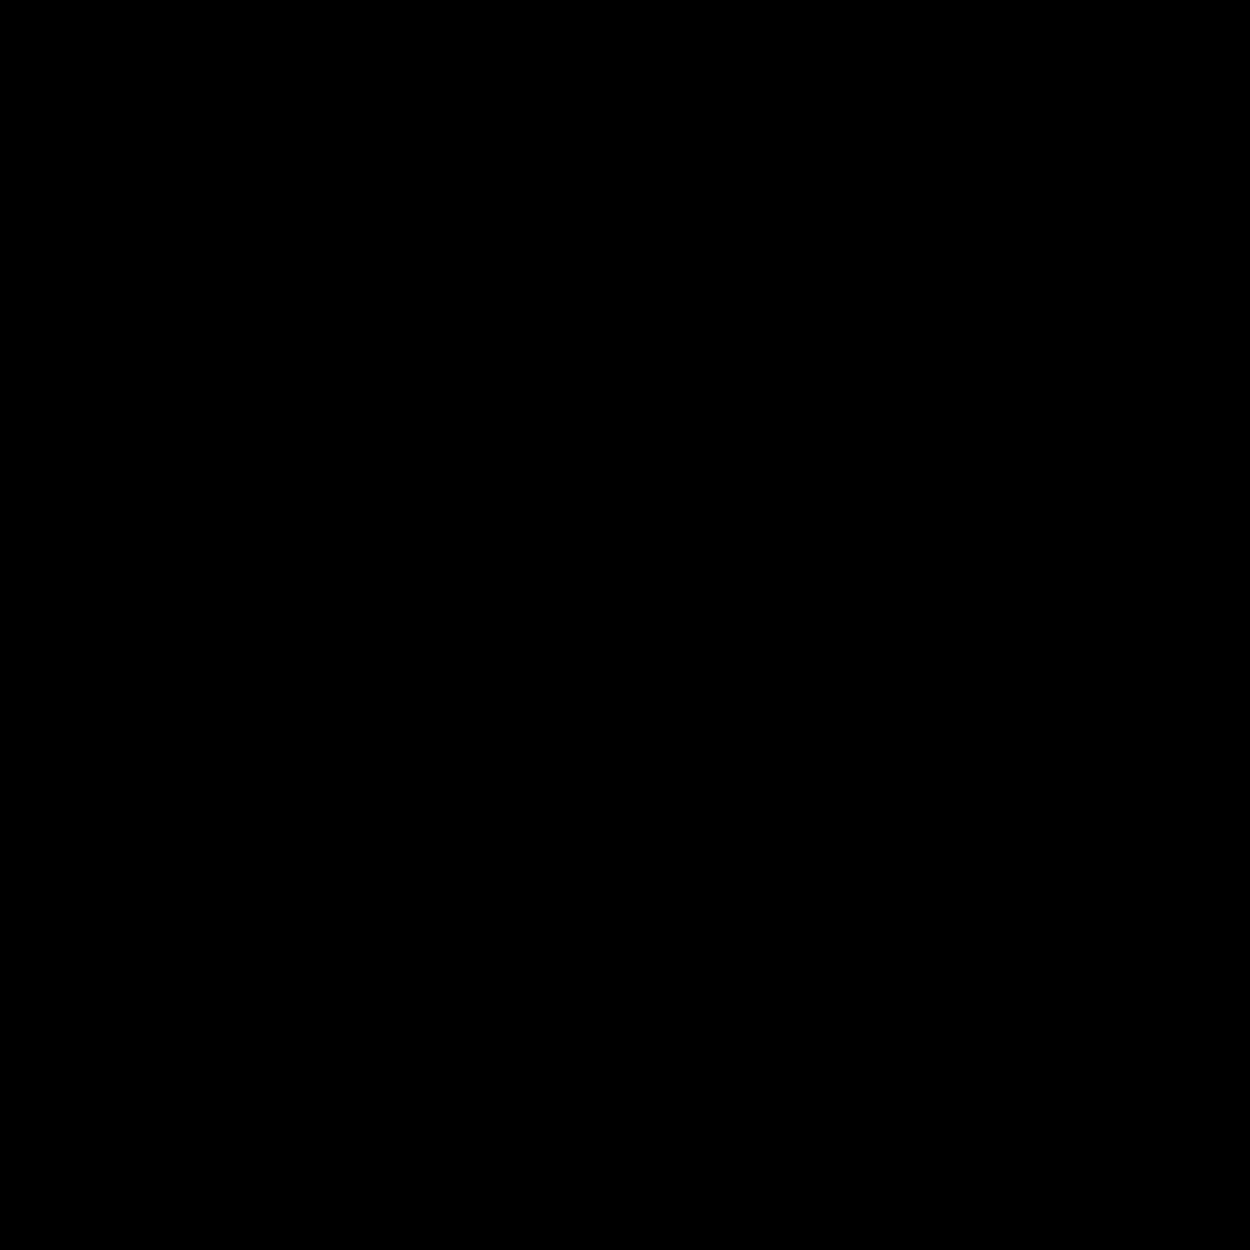

In [45]:
showarray(true_raw[74])

In [69]:
vals = atrain.read_neuron_ids()

In [70]:
true_labs = vals.data.value

In [72]:
true_labs.shape

(13, 1250, 1250)

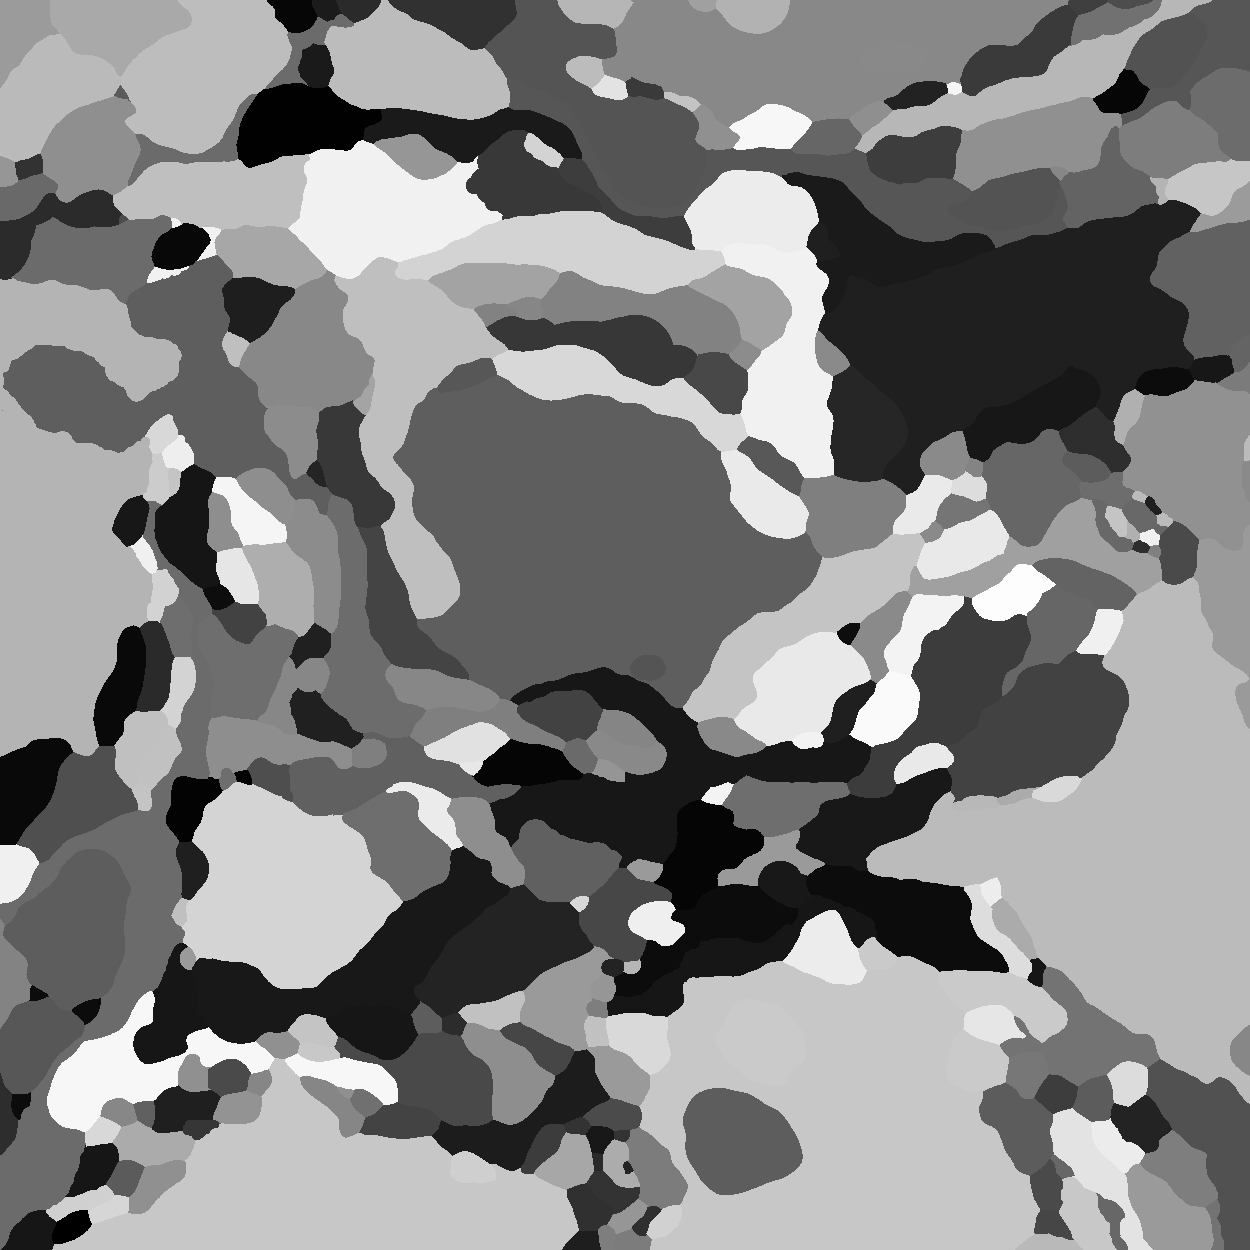

In [75]:
showarray(true_labs[10])

NameError: global name 'Confidences' is not defined

In [28]:
import tifffile as tiff

In [36]:
fil = tiff.imread('snemi3d/train-labels.tif')

In [37]:
fil.shape

(90, 1024, 1024)

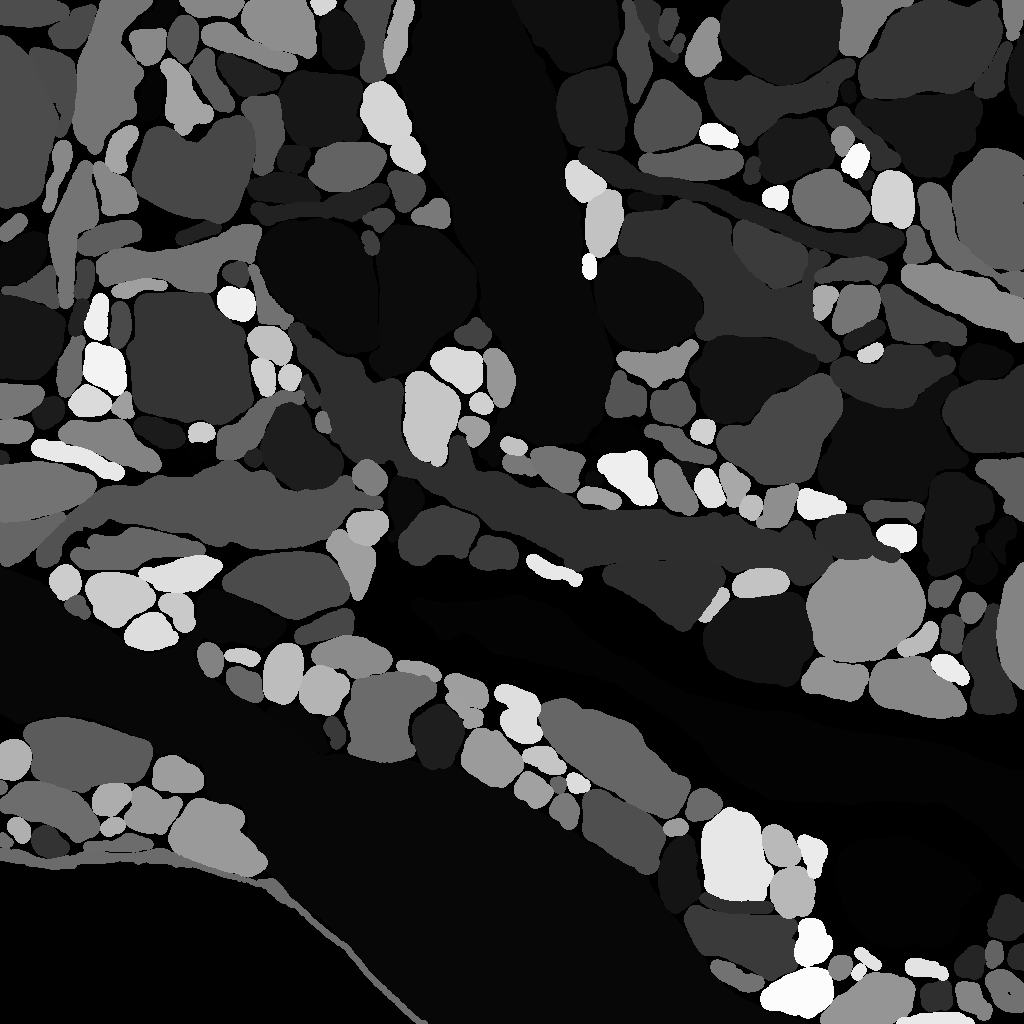

In [40]:
showarray(fil[0])

In [39]:
true_labs[0]

array([[  885,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       [ 2064,  2064,  2064, ..., 24500, 24500, 24500],
       ..., 
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935],
       [ 6036,  6036,  6036, ..., 19935, 19935, 19935]], dtype=uint64)

In [56]:
labs = tiff.imread('snemi3d/train-labels.tif')

In [57]:
labs

array([[[333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        ..., 
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0]],

       [[333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        ..., 
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0]],

       [[333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        [333, 333, 333, ..., 381, 381, 381],
        ..., 
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   0,   0,   0]],

       ..., 
       [[ 24,  24,  24, ...,   0,   0,   0],
        [ 24,  24,  24, ...,   0,   0,   0],
        [ 24,  24,  24, ...,   0,   0, 

In [6]:
import em_dataset as em

In [2]:
cremdset = em.CREMIDataset('cremi/a/')

In [5]:
cremdset.prepare_predictions_for_submission('cremi/a/test/', 'train', cremdset.train_labels, 'segmentation-3d')

In [6]:
del(cremdset)

In [7]:
isbiset = em.ISBIDataset('isbi/')

In [29]:
isbiset.prepare_predictions_for_submission('isbi/test/', 'train', isbiset.train_labels, 'boundaries')

IOError: [Errno 2] No such file or directory: '/home/trace-local/trace/isbi/test/train-predictions.tif'

In [11]:
sampler = em.EMDatasetSampler(isbiset, 200, batch_size=1, label_output_type='boundaries')

In [12]:
sampler.training_example_op

<tf.Tensor 'concat_v2:0' shape=(0, 200, 250, 2) dtype=float32>